In [752]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

plt.style.use('ggplot')

pd.__version__

u'0.17.0'

In [753]:
SSF_subsidies = pd.read_csv("SSFsubsidiesnonfuel.csv")
countries = pd.read_csv("Country_Data.csv")
catch = pd.read_csv("SAU_Catches.csv")
type_EEZ = pd.read_csv("Subtype_Fleet_EEZ.csv")
all_subsidies = pd.read_csv("subsidies2009_nofuel.csv")

In [754]:
SSF_subsidies.columns.values

array(['ID', 'Cnumber', 'RegionID', 'RegionName', 'Type', 'SubType',
       'Category', 'Category_ABC', 'ReEst_Subsidy2009', 'NewData',
       'Developed', 'HDI_2005', 'Countries',
       'SSFsubsidies_assessed_percent', 'weighted_by_sectorsize',
       'Data_group', 'SSF_totalCatch_EEZ_percent',
       'SSF_totalCatch_Country_percent', 'SSF_USD_1000'], dtype=object)

In [755]:
subsidies_type = pd.merge(left=all_subsidies,right=type_EEZ, how='left')

In [757]:
subsidies_type_countries = pd.merge(left=subsidies_type,right=countries, how='left')

In [759]:
subsidies_type_countries_catch = pd.merge(left=subsidies_type_countries,right=catch, how='left')

In [761]:
catch_countries = pd.merge(left=catch, right=countries, how='left')

In [763]:
catch_by_subregion = catch_countries.groupby(['Subregion']).sum()

In [764]:
catch_by_subregion['mean_catch'] = (catch_by_subregion['SSF_Catch']/catch_by_subregion['Total_Catch'])*100

In [765]:
catch_by_subregion = catch_by_subregion.reset_index()

In [766]:
mean_catch = catch_by_subregion.loc[:,['Subregion','mean_catch']]

In [767]:
subsidies_type_countries_catch_meancatch = pd.merge(left=subsidies_type_countries_catch,right=mean_catch, how='left')

In [822]:
subsidies_type_countries_catch_meancatch.to_csv('subsidies_type_countries_catch_meancatch.csv')

In [768]:
SSF_subsidies_countries = pd.merge(left=SSF_subsidies,right=countries, how='left')

In [823]:
SSF_subsidies_countries.to_csv('SSF_subsidies_countries.csv')

In [769]:
SSF_by_subregion = SSF_subsidies_countries.groupby(['Subregion','Type']).sum()

In [837]:
SSF_by_region = SSF_subsidies_countries.groupby(['RegionName','Type']).sum()
SSF_by_region['mean_subsidies_region'] = (SSF_by_region['SSF_USD_1000']/SSF_by_region['ReEst_Subsidy2009'])*100
mean_SSFsubsidies_region = SSF_by_region.loc[:,['Subregion','Type','mean_subsidies_region']]

In [825]:
SSF_by_subregion.to_csv('SSF_by_subregion.csv')

In [828]:
SSF_by_subregion['mean_subsidies_subregion'] = (SSF_by_subregion['SSF_USD_1000']/SSF_by_subregion['ReEst_Subsidy2009'])*100

In [829]:
SSF_by_subregion = SSF_by_subregion.reset_index()

In [830]:
mean_SSFsubsidies_subregion = SSF_by_subregion.loc[:,['Subregion','Type','mean_subsidies_subregion']]

In [840]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies = pd.merge(left=subsidies_type_countries_catch_meancatch,right=mean_SSFsubsidies_subregion, how='left')


subsidies_type_countries_catch_meancatch_meanSSFsubsidies_regions = pd.merge(left=subsidies_type_countries_catch_meancatch_meanSSFsubsidies,right=mean_SSFsubsidies_region, how='left')

subsidies_type_countries_catch_meancatch_meanSSFsubsidies_regions.to_csv('subsidies_type_countries_catch_meancatch_meanSSFsubsidies_regions.csv')

In [832]:
np.sum(subsidies_type_countries_catch_meancatch_meanSSFsubsidies['ReEst_Subsidy2009_original'])

27801451.645998046

In [775]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies['Factor'] = subsidies_type_countries_catch_meancatch_meanSSFsubsidies['SSF_Catch_percent']/subsidies_type_countries_catch_meancatch_meanSSFsubsidies['mean_catch']

In [776]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies['SSF_subsidies_estimates'] = subsidies_type_countries_catch_meancatch_meanSSFsubsidies['Factor']*subsidies_type_countries_catch_meancatch_meanSSFsubsidies['mean_subsidies']

In [777]:
SSF_subsidies_short = SSF_subsidies_countries.loc[:,['Countries','Type','SSFsubsidies_assessed_percent','weighted_by_sectorsize','Data_group','SSF_USD_1000']]

In [778]:
SSF_subsidies_estimates_assessed = pd.merge(left=subsidies_type_countries_catch_meancatch_meanSSFsubsidies,right=SSF_subsidies_short,how='left')

In [779]:
SSF_subsidies_estimates_assessed['SSF_subsidies_percent'] = SSF_subsidies_estimates_assessed['SSFsubsidies_assessed_percent'].fillna(SSF_subsidies_estimates_assessed['SSF_subsidies_estimates'])

In [780]:
SSF_subsidies_estimates_assessed['SSF_subsidies_USD'] = (SSF_subsidies_estimates_assessed['ReEst_Subsidy2009_original']/100)*SSF_subsidies_estimates_assessed['SSF_subsidies_percent']

In [781]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])

5164008.702934619

In [782]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])/np.sum(subsidies_type_countries_catch_meancatch_meanSSFsubsidies['ReEst_Subsidy2009_original'])*100

18.574600954975551

In [783]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])

5164008.702934619

In [784]:
SSF_subsidies_estimates_assessed.to_csv('SSF_subsidies_estimates_assessed.csv')

In [785]:
SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.replace(to_replace='South, Central America and Carribbean',value='S and C America')

In [786]:
SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.rename(columns={'ReEst_Subsidy2009_original': 'total subsidies', 'SSF_subsidies_USD': 'SSF subsidies'})

In [787]:
SSF_subsidies_estimates_assessed['LSF subsidies'] = SSF_subsidies_estimates_assessed['total subsidies']-SSF_subsidies_estimates_assessed['SSF subsidies']

In [788]:
SSF_subsidies_estimates_assessed.iloc[60:100]

,ID,Cnumber,RegionID,RegionName,Countries,Type,SubType,Category,total subsidies,NewData,...,mean_subsidies,Factor,SSF_subsidies_estimates,SSFsubsidies_assessed_percent,weighted_by_sectorsize,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF subsidies,LSF subsidies
60,66,36,5,Oceania,Australia,A1,Fisheries mangt.,Beneficial,61780.418490,0,...,16.578444,0.982318,16.285300,19.461492,TRUE,3,12023.391151,19.461492,12023.391151,49757.027339
61,67,36,5,Oceania,Australia,A2,Fishery R&D,Beneficial,9922.318280,0,...,17.146119,0.982318,16.842937,17.146119,TRUE,3,1701.292472,17.146119,1701.292472,8221.025808
62,68,36,5,Oceania,Australia,A3,MPAs,Beneficial,72077.407561,1,...,18.949043,0.982318,18.613981,19.461492,TRUE,3,14027.338847,19.461492,14027.338847,58050.068714
63,69,36,5,Oceania,Australia,B1,Boat constsruct. & renov.,Capacity-enhancing,89014.750270,0,...,17.146119,1.113140,19.086038,17.146119,TRUE,3,15262.574761,17.146119,15262.574761,73752.175509
64,70,36,5,Oceania,Australia,B2,Fisheries dev. projects,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,71,36,5,Oceania,Australia,B3,Fishing port develop.,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,72,36,5,Oceania,Australia,B4,Markt. & storage infrast.,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,73,36,5,Oceania,Australia,B5,Tax exemption,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,74,36,5,Oceania,Australia,B6,Fishing access,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,76,36,5,Oceania,Australia,C1,Fisher assistance,Ambiguous,28262.262712,0,...,100.000000,1.113140,111.314046,100.000000,TRUE,2,28262.262712,100.000000,28262.262712,0.000000


In [789]:
SSF_subsidies_subregions = SSF_subsidies_estimates_assessed.groupby(['Subregion']).sum()

In [790]:
SSF_subsidies_subregions['SSF_bySubregion_percent'] = SSF_subsidies_subregions['SSF subsidies']/SSF_subsidies_subregions['total subsidies']*100

In [791]:
SSF_subsidies_subregions1 = SSF_subsidies_subregions.loc[:,['LSF subsidies','SSF subsidies']]

In [792]:
SSF_subsidies_subregions1

,LSF subsidies,SSF subsidies
Subregion,,
Australia and New Zealand,423180.168465,81707.153956
Caribbean,16736.209200,76025.413078
Central America,158160.980988,82637.828705
Eastern Africa,20294.533104,22543.050828
Eastern Asia,6280863.609364,1775072.002682
Eastern Europe,1672235.093381,96149.220373
Melanesia,702665.906685,17691.529726
Micronesia,1968515.877487,42264.556679
Middle Africa,81068.041156,64681.593045


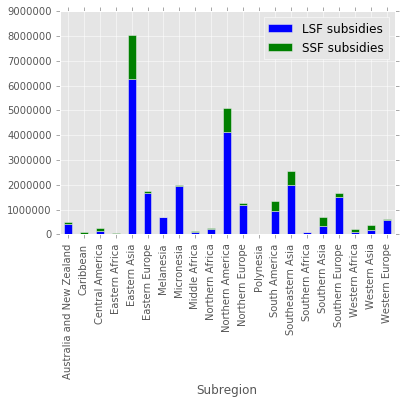

In [793]:
SSF_subsidies_subregions1.plot(kind='bar', stacked=True)

In [794]:
SSF_subsidies_regions = SSF_subsidies_estimates_assessed.groupby(['RegionName']).sum()

In [795]:
SSF_subsidies_regions1 = SSF_subsidies_regions.loc[:,['RegionName','total subsidies','SSF subsidies']]

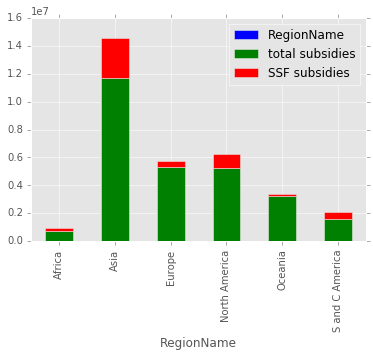

In [796]:
SSF_subsidies_regions1.plot(kind='bar', stacked=True)

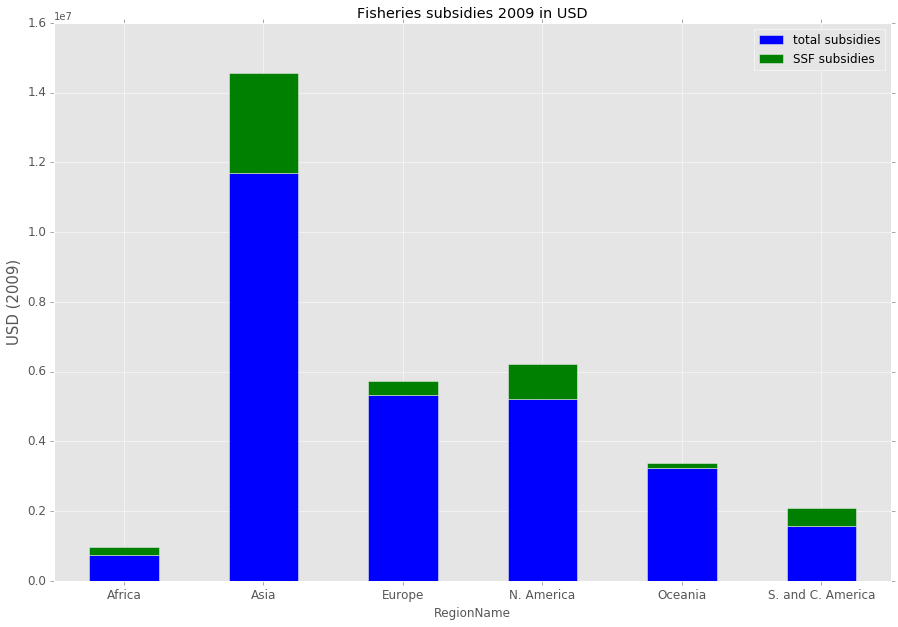

In [797]:
ax = SSF_subsidies_regions[['total subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD",stacked = True, figsize=(15,10),legend=True, fontsize=12)

ax.set_ylabel("USD (2009)",fontsize=15)
labels=ax.set_xticklabels(['Africa','Asia','Europe','N. America','Oceania','S. and C. America'],rotation=360)

plt.show()

In [798]:
SSF_subsidies_regions = SSF_subsidies_regions.sort_values(by=['total subsidies'],ascending=False)

In [799]:
SSF_subsidies_regions['SSF percent per region'] = SSF_subsidies_regions['SSF subsidies']/SSF_subsidies_regions['total subsidies']*100

In [800]:
SSF_subsidies_regions['SSF percent per region']

RegionName
Asia               24.463392
Europe              7.798976
North America      19.120420
Oceania             4.363371
S and C America    32.250079
Africa             32.485492
Name: SSF percent per region, dtype: float64

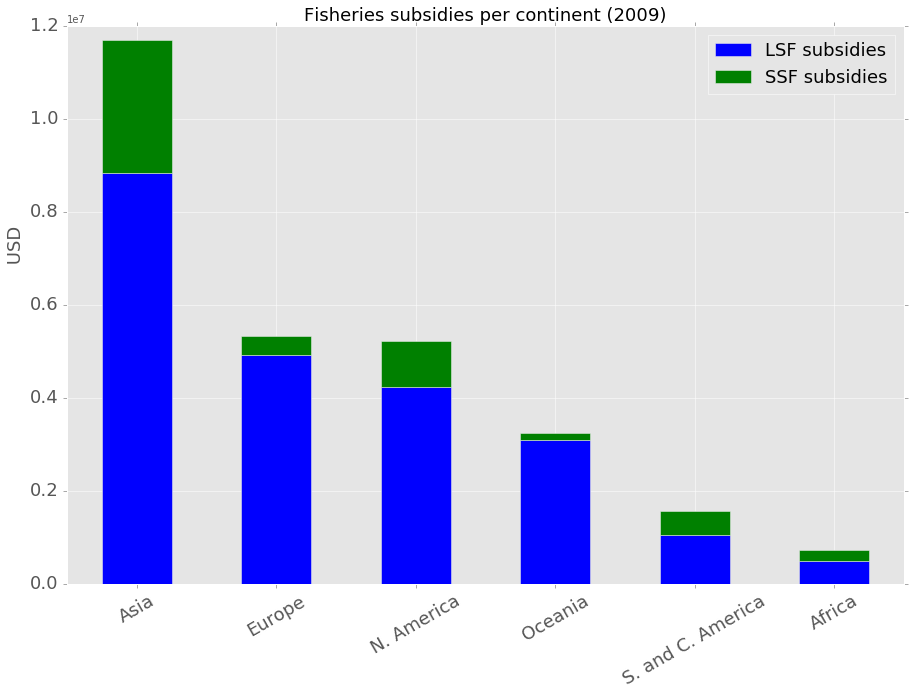

In [801]:
ax = SSF_subsidies_regions[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies per continent in 2009 USD", figsize=(15,10),stacked=True, legend=True, fontsize=18)
ax.set_ylabel("                     USD",fontsize=18)
ax.set_xlabel(" ")
ax.set_title("Fisheries subsidies per continent (2009)", fontsize=18)
plt.legend(loc='best',fontsize=18)
labels=ax.set_xticklabels(['Asia','Europe','N. America','Oceania','S. and C. America','Africa'],rotation=30)
plt.savefig('Subsidies_Continents.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Continents.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [802]:
Subsidies_per_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType']).sum()

In [803]:
Subsidies_per_subtype = Subsidies_per_subtype.sort_values(by=['total subsidies'],ascending=False)

In [804]:
Subsidies_per_subtype['SSF subsidies']

SubType
Fisheries mangt.             1836998.215018
Fishing port develop.         721539.991064
Boat constsruct. & renov.     502396.242591
Fishery R&D                   585999.105900
Markt. & storage infrast.     191138.732970
Vessel buyback                  3483.168888
Fisher assistance             478124.649766
MPAs                          271053.864297
Tax exemption                 147192.423860
Fisheries dev. projects       276760.229474
Fishing access                  2772.689895
Rural fisher communities      146549.389211
Name: SSF subsidies, dtype: float64

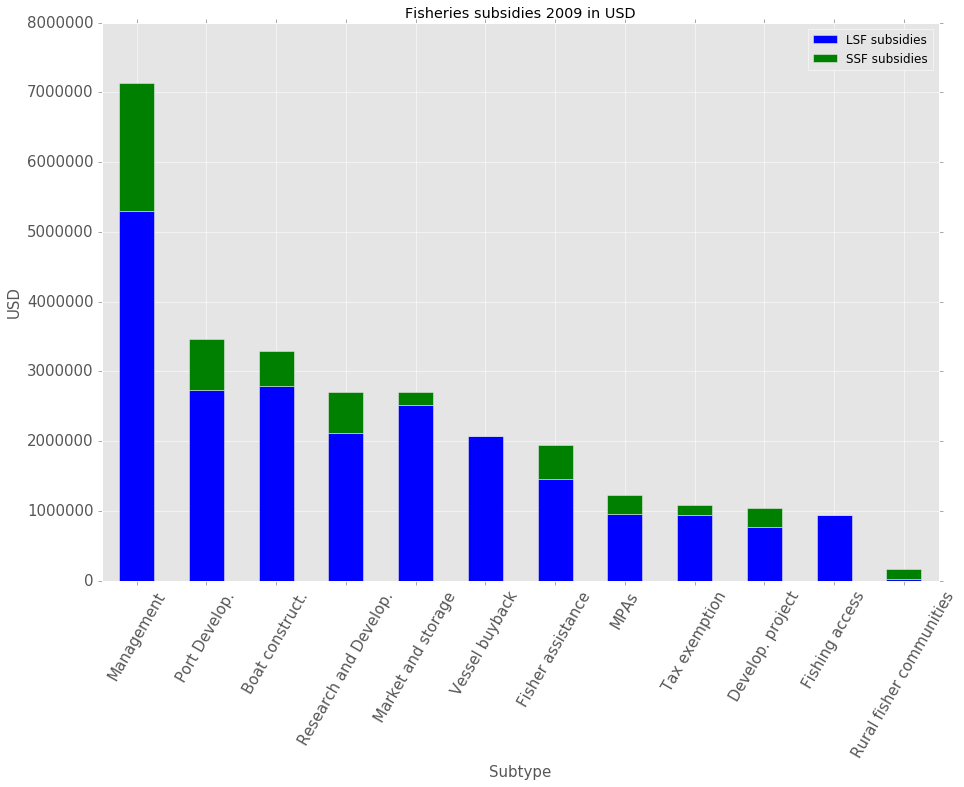

In [805]:
ax = Subsidies_per_subtype[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD", figsize=(15,10),stacked=True, legend=True, fontsize=15)
ax.set_ylabel("USD",fontsize=15)
ax.set_xlabel("Subtype",fontsize=15)
labels=ax.set_xticklabels(['Management','Port Develop.','Boat construct.','Research and Develop.','Market and storage','Vessel buyback','Fisher assistance','MPAs','Tax exemption','Develop. project','Fishing access','Rural fisher communities'],rotation=60)
plt.show()

In [806]:
Subsidies_category_subtype = SSF_subsidies_estimates_assessed.groupby(['Category','SubType']).sum()

In [807]:
Subsidies_category_subtype = Subsidies_category_subtype.loc[:,['LSF subsidies','SSF subsidies']]

In [808]:
Subsidies_category_subtype_transposed = Subsidies_category_subtype.transpose()

In [809]:
Subsidies_category_subtype_transposed

Category              Ambiguous                                           \
SubType       Fisher assistance Rural fisher communities  Vessel buyback   
LSF subsidies    1462026.998999             16585.276948  2074451.044869   
SSF subsidies     478124.649766            146549.389211     3483.168888   

Category            Beneficial                                 \
SubType       Fisheries mangt.     Fishery R&D           MPAs   
LSF subsidies   5297149.259259  2110742.635512  956779.512488   
SSF subsidies   1836998.215018   585999.105900  271053.864297   

Category             Capacity-enhancing                          \
SubType       Boat constsruct. & renov. Fisheries dev. projects   
LSF subsidies            2794855.982548           768384.215590   
SSF subsidies             502396.242591           276760.229474   

Category                                                                      \
SubType       Fishing access Fishing port develop. Markt. & storage infrast.   
LSF subsidies  934505.963324        2736290.234120            2512732.172534   
SSF subsidies    2772.689895         721539.991064             191138.732970   

Category                      
SubType        Tax exemption  
LSF subsidies  941112.914522  
SSF subsidies  147192.423860

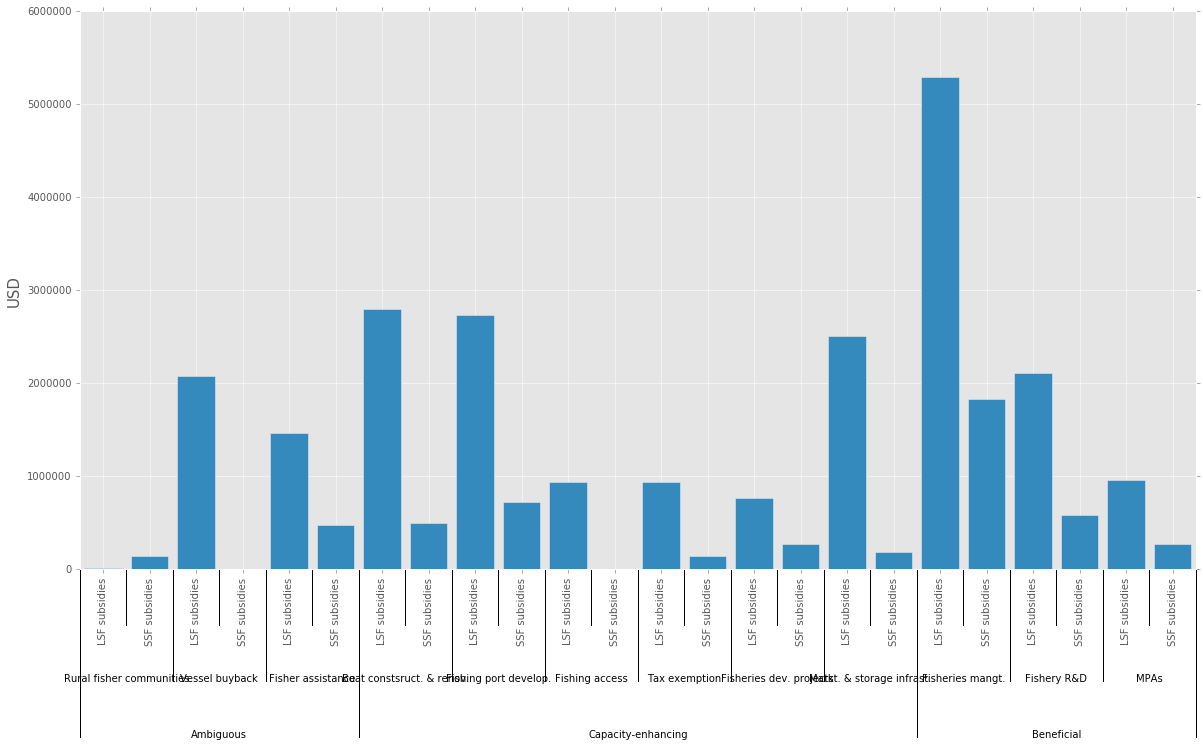

In [810]:
# source: sam clarke
def transform_group_data(data):
    '''
    Funtion for creating a three-level dict 
    from a two-level dict with two-tuple as key.
    '''
    transformed_data = {}
    for k, v in data.items():
        if k[0] in transformed_data.keys():
            transformed_data[k[0]][k[1]] = v
        else:
            transformed_data[k[0]] = {k[1]: v}
    return transformed_data
    
    
# source:  http://stackoverflow.com/questions/19184484/how-to-add-group-labels-for-bar-charts-in-matplotlib
def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)

    ax.bar(xticks, y, align='center')
    ax.set_xticks(xticks)
    ax.set_xticklabels(x, rotation=90)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in xrange(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1
        
# group the data        
group_data = Subsidies_category_subtype_transposed.to_dict()

# transform the data from two-level three-level dict
transformed_data = transform_group_data(group_data)

# configure plot
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,1,1)


# plot
label_group_bar(ax, transformed_data)


# not sure what this does.... 
# fig.subplots_adjust(bottom=0.3)

# TODO: rotate label axis!
ax.set_ylabel("USD",fontsize=15)



In [811]:
transformed_data

{'Ambiguous': {'Fisher assistance': {'LSF subsidies': 1462026.9989992599,
   'SSF subsidies': 478124.6497660646},
  'Rural fisher communities': {'LSF subsidies': 16585.276947871724,
   'SSF subsidies': 146549.38921078487},
  'Vessel buyback': {'LSF subsidies': 2074451.0448688618,
   'SSF subsidies': 3483.1688880456272}},
 'Beneficial': {'Fisheries mangt.': {'LSF subsidies': 5297149.2592590563,
   'SSF subsidies': 1836998.2150176},
  'Fishery R&D': {'LSF subsidies': 2110742.6355123604,
   'SSF subsidies': 585999.10589979659},
  'MPAs': {'LSF subsidies': 956779.51248840219,
   'SSF subsidies': 271053.86429705971}},
 'Capacity-enhancing': {'Boat constsruct. & renov.': {'LSF subsidies': 2794855.9825483616,
   'SSF subsidies': 502396.24259073264},
  'Fisheries dev. projects': {'LSF subsidies': 768384.21558994532,
   'SSF subsidies': 276760.22947440849},
  'Fishing access': {'LSF subsidies': 934505.96332426183,
   'SSF subsidies': 2772.6898951225821},
  'Fishing port develop.': {'LSF subsidi

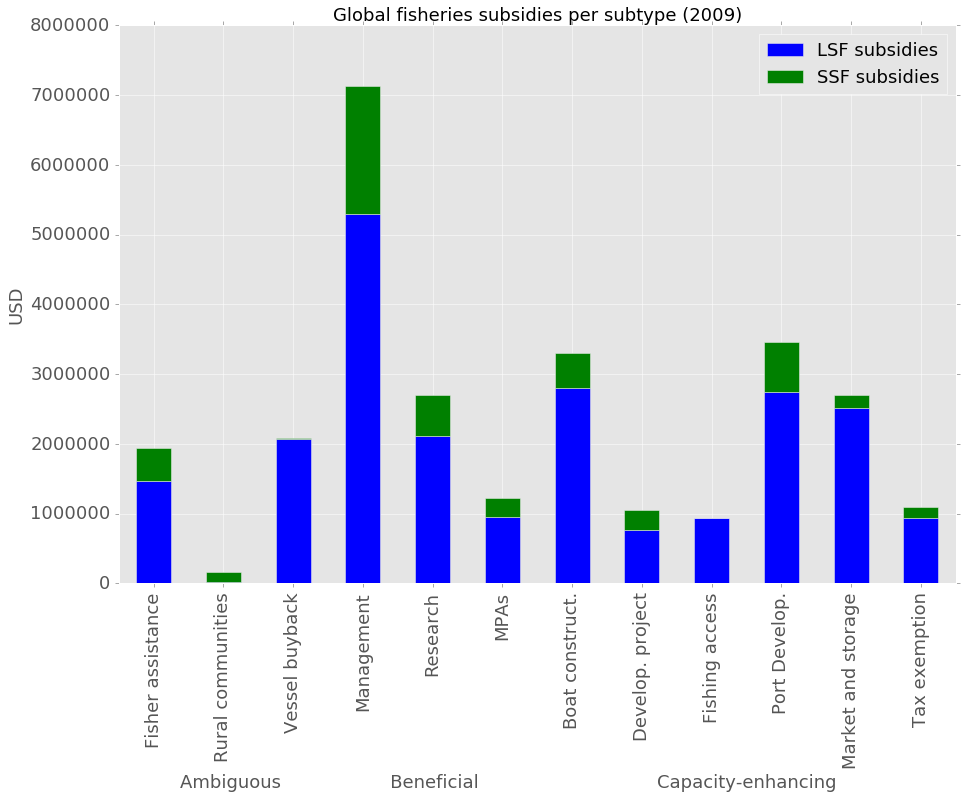

In [812]:
fig = plt.figure()
ax = Subsidies_category_subtype[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies per category in 2009 USD", figsize=(15,10),stacked=True, legend=True, fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("Ambiguous                   Beneficial                               Capacity-enhancing          ",fontsize=18,)
ax.set_title("Global fisheries subsidies per subtype (2009)", fontsize=18)
labels=ax.set_xticklabels(['Fisher assistance','Rural communities','Vessel buyback', 'Management', 'Research', 'MPAs', 'Boat construct.', 'Develop. project', 'Fishing access', 'Port Develop.', 'Market and storage', 'Tax exemption'],rotation=90)
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_Type.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Type.pdf', dpi=400, bbox_inches='tight')
plt.show()


In [813]:
Subsidies_category_subtype.sort_values(by=['LSF subsidies'],ascending=False)

LSF subsidies   SSF subsidies
Category           SubType                                                  
Beneficial         Fisheries mangt.           5297149.259259  1836998.215018
Capacity-enhancing Boat constsruct. & renov.  2794855.982548   502396.242591
                   Fishing port develop.      2736290.234120   721539.991064
                   Markt. & storage infrast.  2512732.172534   191138.732970
Beneficial         Fishery R&D                2110742.635512   585999.105900
Ambiguous          Vessel buyback             2074451.044869     3483.168888
                   Fisher assistance          1462026.998999   478124.649766
Beneficial         MPAs                        956779.512488   271053.864297
Capacity-enhancing Tax exemption               941112.914522   147192.423860
                   Fishing access              934505.963324     2772.689895
                   Fisheries dev. projects     768384.215590   276760.229474
Ambiguous          Rural fisher communities     16585.276948   146549.389211

In [814]:
Subsidies_per_Category = SSF_subsidies_estimates_assessed.groupby(['Category']).sum()

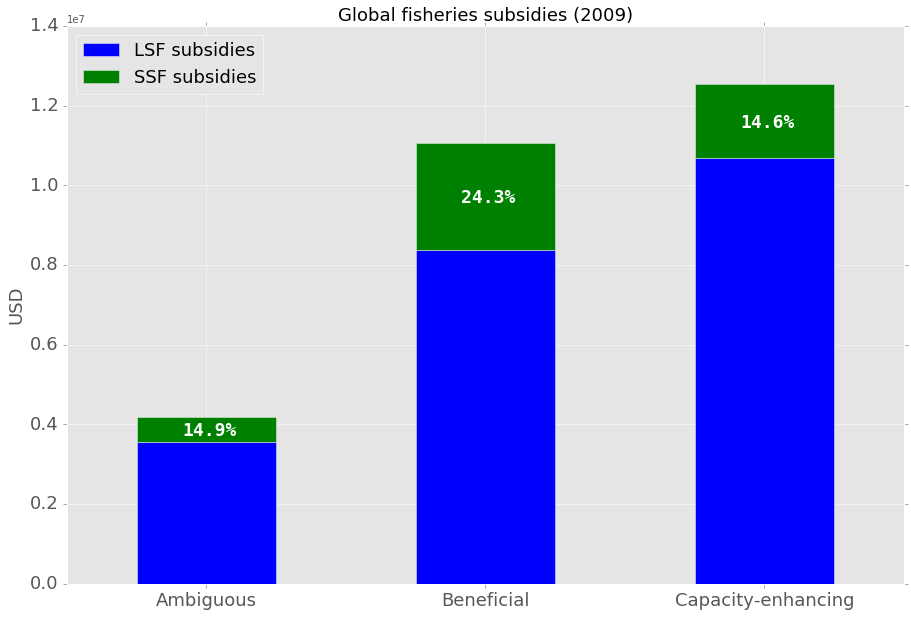

In [815]:
data = Subsidies_per_Category[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# where do these percentages come from?
SSFpercent = (
    {'label': 'Ambiguous', 'percentage': 14.9}, 
    {'label': 'Beneficial', 'percentage': 24.3},
    {'label': 'Capacity-enhancing', 'percentage': 14.6}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# print("data_dict {}".format(data_dict))


# create subplot
ax = data.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18)
ax.set_title("Global fisheries subsidies (2009)", fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Ambiguous','Beneficial', 'Capacity-enhancing'],rotation=360, fontsize=18)

# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)

# prepare rects
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 


# now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #  get percenatage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage) / 2)
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  - 11**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=18,
        fontweight="bold",
        color="white"
    )


plt.savefig('Subsidies_Category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Category.pdf', dpi=400, bbox_inches='tight')
plt.legend(loc=2,fontsize=18)
plt.show()

In [816]:
Subsidies_per_Category['percent SSF Category'] = Subsidies_per_Category['SSF subsidies']/Subsidies_per_Category['total subsidies']*100

In [817]:
Subsidies_per_Category['percent SSF Category']

Category
Ambiguous             15.007584
Beneficial            24.325863
Capacity-enhancing    14.686220
Name: percent SSF Category, dtype: float64

In [818]:
SSF_subsidies_subregions

,ID,Cnumber,RegionID,total subsidies,NewData,HDI_2005,EEZ,CID,CLon,CLat,...,mean_subsidies,Factor,SSF_subsidies_estimates,SSFsubsidies_assessed_percent,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF subsidies,LSF subsidies,SSF_bySubregion_percent
Subregion,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,16230,7080,120,504887.322421,2,22.860,6,1248,3664.081188,-822.901812,...,339.639448,26.813140,373.259414,201.091578,23,81707.153956,363.866569,81707.153956,423180.168465,16.183245
Caribbean,126321,54492,624,107404.255607,8,64.980,39,9924,-10411.643976,2585.458752,...,7411.157368,136.459782,6536.674818,861.992717,21,35156.905381,6358.086260,76025.413078,16736.209200,70.784358
Central America,77712,33444,408,241200.211922,7,73.188,24,5820,-8474.924676,1362.099468,...,2132.090570,105.917630,2439.663933,654.152240,53,62655.062057,2625.089697,82637.828705,158160.980988,34.261093
Eastern Africa,129666,55428,360,43038.267158,6,64.752,30,9732,5297.300544,-533.793996,...,3861.228245,121.284860,3843.866913,1105.709852,41,16090.738735,3939.724200,22543.050828,20294.533104,52.379086
Eastern Asia,52746,22404,144,8055935.612046,6,43.188,18,5232,8780.757600,2337.849348,...,1276.300098,78.556906,1425.788939,649.596110,96,1765444.503787,1413.667195,1775072.002682,6280863.609364,22.034337
Eastern Europe,78405,33660,60,1768384.313754,22,39.540,15,5952,2341.348656,3017.813520,...,822.677840,43.322447,592.737451,501.209243,81,95764.050716,701.347050,96149.220373,1672235.093381,5.437122
Melanesia,41040,17736,240,720357.436411,5,17.232,12,5040,7790.077584,-588.252408,...,167.895628,88.035180,286.111090,90.737416,29,16035.132832,326.094196,17691.529726,702665.906685,2.455938
Micronesia,71697,30816,300,2010780.434165,0,31.296,15,5388,5682.529488,273.909156,...,194.220437,353.074663,1035.956084,38.844087,14,38256.995231,908.046679,42264.556679,1968515.877487,2.101898
Middle Africa,45651,20064,252,145749.634201,7,19.860,21,3312,1153.914612,-141.653880,...,2978.977582,115.132685,3925.754055,1129.303783,39,63123.326237,3895.473215,64681.593045,81068.041156,44.378563


In [819]:
SSF_subsidies_subregions1 =  SSF_subsidies_subregions1.sort_values('LSF subsidies', ascending=False)

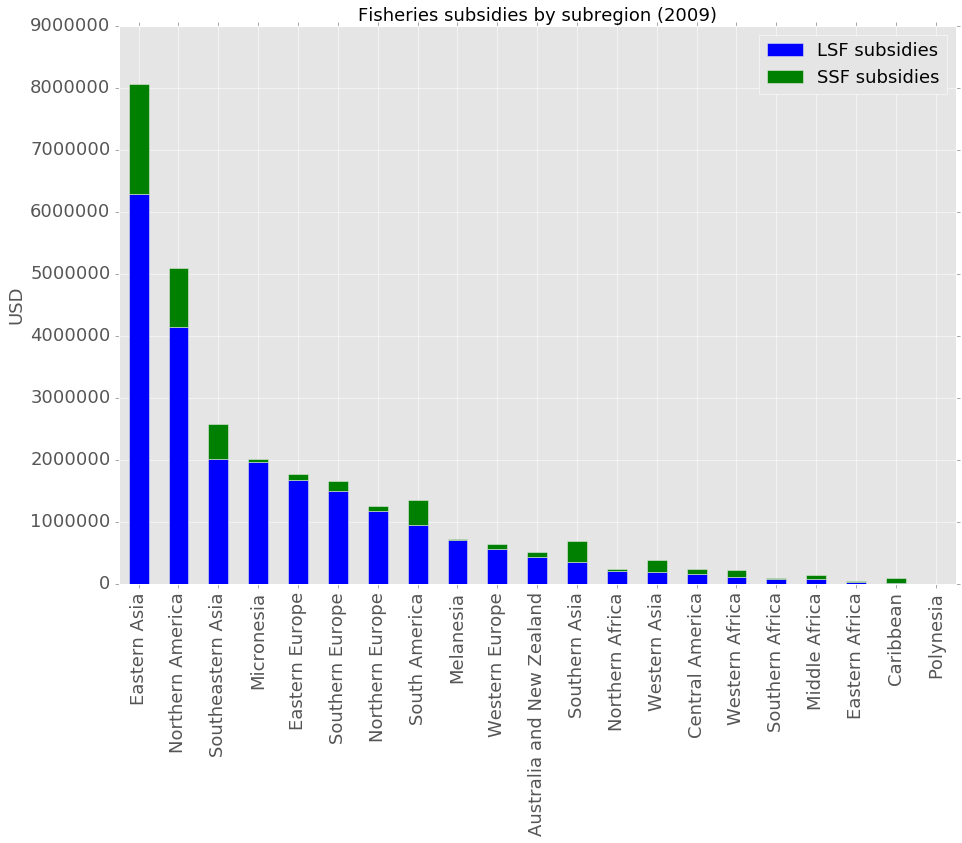

In [820]:
ax = SSF_subsidies_subregions1.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18)
SSF_subsidies_subregions1['total subsidies'] = SSF_subsidies_subregions1['LSF subsidies'] + SSF_subsidies_subregions1['SSF subsidies']
SSF_subsidies_subregions1['total subsidies'] = SSF_subsidies_subregions1['LSF subsidies'] + SSF_subsidies_subregions1['SSF subsidies']

ax.set_title("Fisheries subsidies by subregion (2009)", fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("",fontsize=18)


plt.legend(loc='best',fontsize=18)
plt.show()

In [821]:
SSF_subsidies_estimates_assessed.to_csv('subsidies_assessed_nofuel.csv')